# Vizag Tourism Guide: Travel Guide to Explore Attractions. 

## Business Problem:
Visakhapatnam (also known as Vizag, Viśākha or Wāltair) is the largest city in the Indian state of Andhra Pradesh, serving as headquarters of the Visakhapatnam district and the city is set to become the executive capital of Andhra Pradesh and one of the four smart cities of Andhra Pradesh. In addition having great history, Vizag also have adorable climate for being situated between the Eastern Ghats and the coast of the Bay of Bengal which makes Vizag a tourism destination for tourists who for leisure activites.

The target audience for this project are tourists main approach deals with helping them to explore the city to find out what are popular venues and Cityscapes such as Neighbourhoods and Landmarks on their own instead of reaching out to a travel guide which puts additional cost in their budget.



# Data

This section includes description of the data and how it will be used to solve the problem.

Clearly, to solve the above business problem we need location data. What is location data? Location data is data which describes places and venues, such as their geographical location, their category, working hours, full address, and so on, such that for a given location given in the form of its geographical coordinates (or latitude and longitude values) one is able to determine what types of venues exist within a defined radius from that location.


So, for a given location you will be able to tell which place exists nearby, it may be any place which is present in the data. Now among the many location data providers are i) **Foursquare**,
                                                                                                                                                                            ii) **Google Places**,
                                                                                                                                                                            iii) **Yelp**.
   
How to choose a Location data provider: 1) **Rate Limits**,
                                        2) **Costs**,
                                        3) **Coverage**,
                                        4) **Accuracy**,
                                        5) **Update Frequency**.
                    Foursquare update their data continuously, whereas other providers would update their data either daily or weekly depending on their location data.

## Data Collection:
#### Foursquare:
But as far as this project is concerned, we will use the Foursquare location dataset since their dataset to be the most comprehensive so far. Also creating a developer account to use their API is quite straightforward and easiest compared to other providers. We'll explore the so called smart city by leveraging location data to find out the venues.
#### Web Scraping:
To extract the Cityscapes i.e., Neighbourhoods and Landmarks we'll BeautifulSoup package.



# Methodology

Methodology section represents the main component of the report where we'll identify and explore the Venues and display those venues with their respected addresses, upto 10 km as well as we'll display the Neighbourhoods and Landmarks of Visakhapatnam city.

This would enable any visitor/tourist to identify the venues he/she wants to visit on their taste.

As a first step, we will retrieve the data from Foursquare API. We extract venue information from the center of Visakhapatnam, within 4 Km range.

Secondly, we will extract data Cityscapes i.e., Neighbourhoods and Landmarks from [link] https://en.wikipedia.org/wiki/Visakhapatnam

Next, We'll display places where venues are located and Cityscapes so that any visitor can go to any place and enjoy the option to explore many venues and places on his/her own without the need of reaching out for an tourist guide.

Finally, we'll impose Venues and Cityscapes on the Visakhapatnam map to be explored based on visitor requirement of a place to visit.


We'll perform exploratory data analysis to find out the popular restaurants and category of the restaurants.


#### Before we start with the main content, let's download all the dependencies that we will need.

In [1]:
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
#7from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

#### We begin by displaying geographical coordinates of the Visakhapatnam by using geocoder and Nominatim to convert an address to it's respective latitude and longitude

In [2]:
address = 'Visakhapatnam'

geolocator = Nominatim(user_agent='Foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Visakhapatnam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Visakhapatnam are 17.7231276, 83.3012842.


#### Let's examine the Visakhapatnam map using Folium: map rendering library which we are going to impose Venues and address on top of it. 

In [5]:
# Displaying Visakhapatnam
import folium
vskp_map = folium.Map(location = [latitude, longitude], zoom_start = 13)
folium.Marker([latitude, longitude]).add_to(vskp_map)
vskp_map

### Foursquare API:

 We fetch a total of all venues in Visakhapatnam upto a range of 10 Kilometers from the center of the city using the Foursquare API. The Foursquare API has the explore API which allows us to find venue recommendations within a given radius for the given coordinates. We will use this API to find all the venues we need.

In [6]:
FOURSQUARE_CLIENT_ID = 'VPWPTDKYLU1GED5FVVY4TNTVNPGRT5L1TOZSI5MILNR3BXNH'
FOURSQUARE_CLIENT_SECRET = '3QGSQKOYOP5EC2MFKL4ZDUH10BEC0QHOZIXF1CV5K3MIVOZD'
RADIUS = 10000 # 10 Km
NO_OF_VENUES = 100
VERSION = '20200522' # Current date

#### We defined Function: get_category() to extract category names of the venues as we know information we'll in the form of keys.

In [7]:
def get_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We'll call the API over and over till we get all venues from the API within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API and increasing the offset each time.

Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account.
We will set the radius as 10 Kilometers.
The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.

In [8]:

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng', 'address'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        latitude, 
                                                                        longitude, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    result
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.address']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
#print("\nTotal {} venues fetched".format(total_venues))
foursquare_venues

Total 72 venues fetched within a total radius of 10.0 Km


,name,categories,lat,lng,address
0,Food Ex,Fast Food Restaurant,17.722155,83.318422,Siripuram
1,Novotel Varun Beach,Restaurant,17.710712,83.316263,Beach Road
2,Ramakrishna Mission Beach,Beach,17.715271,83.324016,Beach Rd.
3,Cream & Fudge,Ice Cream Shop,17.719339,83.311927,Ramnagar
4,Waltair Club,Restaurant,17.720580,83.316784,Waltair Uplands
5,Novotel Visakhapatnam Varun Beach,Hotel,17.710829,83.316218,Beach Road
6,Sweet India,Snack Place,17.725087,83.316572,NaN
7,Inox,Multiplex,17.711077,83.315785,Varun Beach
8,Jagadamba Theater,Indie Movie Theater,17.712247,83.302338,Jagadamba Junction
9,Pastry Coffee & Conversation,Café,17.724092,83.317831,"Dutt Island, Sirpuram"


#### Let's visualize these  Foursquare data items on the  Visakhapatnam map around our location.

In [9]:
vskp_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

for name, lat, lng, address in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng'], foursquare_venues['address']):
    label = '{},{}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(vskp_map)  
vskp_map

#### Exploratory Data Analysis:

By using the Foursquare API to obtain information of the 100 closest venues to the location coordinates which were provided. The information about these venues were then stored in a dataframe using the Python data analysis tool kit Pandas. The next stage of data analysis involved grouping the 100 closest venues into categories and then determining what were the most and least prevalent types of venues in the vicinity of Visakhapatnam city.

In [10]:
categorynamedf = foursquare_venues[['categories']]
categorynamedf['Number of Occurences'] = 1
categorynamedf = categorynamedf.groupby('categories').count()
categorynamedf['Percentage of Occurences'] = categorynamedf['Number of Occurences']/(categorynamedf['Number of Occurences'].sum()/100)
categorynamedf = categorynamedf.sort_values(by='Percentage of Occurences', ascending=False)
categorynamedf

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Number of Occurences,Percentage of Occurences
categories,,
Indian Restaurant,9,12.500000
Café,6,8.333333
Hotel,6,8.333333
Ice Cream Shop,4,5.555556
Beach,3,4.166667
Snack Place,3,4.166667
Restaurant,3,4.166667
Multiplex,3,4.166667
Food Court,2,2.777778


<BarContainer object of 37 artists>

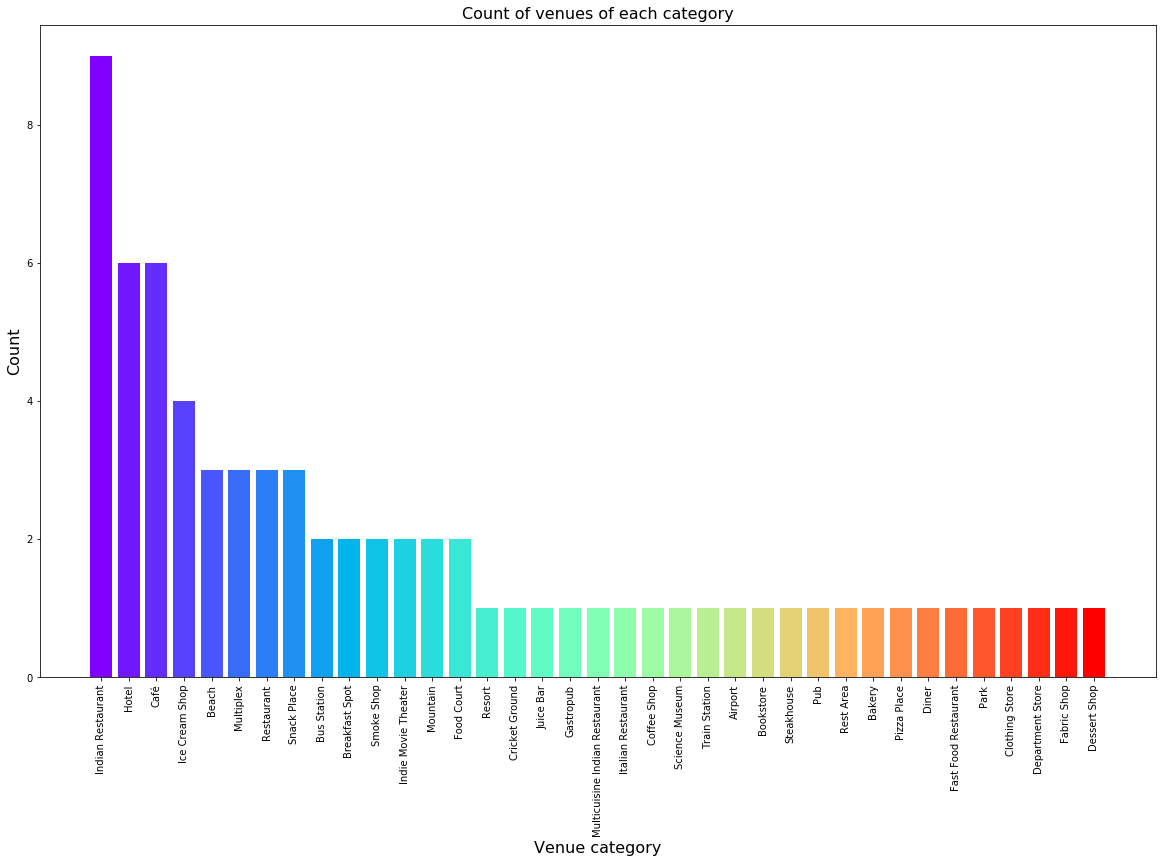

In [25]:
import numpy as np
import matplotlib.pyplot as plt

venue_distribution = foursquare_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

It's evident that **Indian restaurants** are more popular in Visakhapatnam, tourists must make a preference to visit Indian restaurant to experience the gustatory delights of Indian cuisine. From the above table and graph they can decide which venue to visit and which one to not visit. 

## Web Scraping:

From this wikipedia [link]  https://en.wikipedia.org/wiki/Visakhapatnam page; we are going to extract Cityscapes section such as Neighbourhoods and Landmarks.

* Neighbourhoods: Allipuram, Arilova, Asilmetta, Dwaraka Nagar, Gajuwaka, Gopalapatnam, Jagadamba Centre, Lawsons Bay Colony, Maddilapalem, Madhurawada, MVP Colony, Rushikonda, Seethammadhara, Siripuram, Visakhapatnam, Anakapalle, Bheemunipatnam, Duvvada, Parawada, Pendurthi, Thagarapuvalasa. *


* Landmarks: Dolphin's Nose, Lighthouse, Kailasagiri, Beach Road, Visakhapatnam, VUDA Park, Visakha Museum, INS Kursura (S20), TU 142 Aircraft Museum, Indira Gandhi Zoological Park, Erra Matti Dibbalu, Sand dunes, Telugu Samskruthika Niketanam, City Central Park, RK Beach, Rushikonda, Mangamaripeta, Yarada Beach, Bheemili Beach, Sagar Nagar, Borra Caves, William King (geologist), Kambalakonda Wildlife Sanctuary, Andhra Pradesh Forest Department. *  
    
       And to display these attractions on to the Visakhapatnam map we don't have latitude and longitude readily available so, we'll be using geopy.geocoder and Nominatim to convert these addresses into latitude and longitude coordinates and then we'll pass these coordinates in to folium to impose these places on to the Vizag map.


#### get_neighbourhoods() function : extracts all the anchor tags in the neighbourhoods section

In [11]:
from bs4 import BeautifulSoup
import requests as req
import pandas as pd


def get_neighbourhoods():
    URL = "https://en.wikipedia.org/wiki/Visakhapatnam"
    resp = req.get(URL)
    bs = BeautifulSoup(resp.text, "lxml")
    anchors = bs.find(id="Neighbourhoods").find_next(name="p").find_all("a")
    result = []
    for a in anchors:
        result.append(a["title"])
    return result

get_neighbourhoods()

['Allipuram',
 'Arilova',
 'Asilmetta',
 'Dwaraka Nagar',
 'Gajuwaka',
 'Gopalapatnam',
 'Jagadamba Centre',
 'Lawsons Bay Colony',
 'Maddilapalem',
 'Madhurawada',
 'MVP Colony',
 'Rushikonda',
 'Seethammadhara',
 'Siripuram, Visakhapatnam',
 'Anakapalle',
 'Bheemunipatnam',
 'Duvvada',
 'Parawada',
 'Pendurthi',
 'Thagarapuvalasa']

#### get_landmarks() function will extracts all the anchor tags in landmarks section: 

Actually there are three paragraphs in Landmarks section and each section has citations.
A Citation is the way you tell your readers that certain material in your work came from another source. It also gives readers the information necessary to find that source again, including: information about the author, the title of the work.  

While doing so parser is unable to parse through the code so, that's why the try and except block is used to catch and handle exceptions. Python executes code following the try statement as a “normal” part of the program (we are taking title of the anchor tag). The code that follows the except statement is the program's response to any exceptions in the preceding try clause.


In [12]:
from bs4 import BeautifulSoup
import requests as req

def get_landmarks():
    URL = "https://en.wikipedia.org/wiki/Visakhapatnam"
    resp = req.get(URL)
    bs = BeautifulSoup(resp.text, "lxml")
    ps = bs.find(id="Landmarks").find_all_next(name="p")[:3]
    result1 = []
    for p in ps:
    	anchors = p.find_all("a")
    	for a in anchors:
        		try:
        			if not a["href"].startswith("#"):
        				result1.append(a["title"])
        		except Exception as e:
        			print(a)
        			print(e)
    return result1         
                    
get_landmarks()                    


["Dolphin's Nose",
 'Lighthouse',
 'Kailasagiri',
 'Beach Road, Visakhapatnam',
 'VUDA Park',
 'Visakha Museum',
 'INS Kursura (S20)',
 'TU 142 Aircraft Museum',
 'Indira Gandhi Zoological Park',
 'Erra Matti Dibbalu',
 'Sand dunes',
 'Telugu Samskruthika Niketanam',
 'City Central Park',
 'RK Beach',
 'Rushikonda',
 'Mangamaripeta',
 'Yarada Beach',
 'Bheemili Beach',
 'Sagar Nagar',
 'Borra Caves',
 'William King (geologist)',
 'Kambalakonda Wildlife Sanctuary',
 'Andhra Pradesh Forest Department']

#### Let's call get_neighbourhoods() function and store in Neighbourhoods data frame

In [14]:
data = {"Neighbourhoods": get_neighbourhoods()} # creating neighbourhoods column and storing data 
Neighbourhoods= pd.DataFrame(data)

latitude_arr, longitude_arr = [], [] # defining two lists

for a in Neighbourhoods["Neighbourhoods"]:
    geolocator = Nominatim(user_agent = "Foursquare_agent")
    location = geolocator.geocode(a)
    if location is not None: # some neighbourhoods doesn't has lat and lng to check this if is used
        latitude_arr.append(location.latitude), longitude_arr.append(location.longitude)
    else:
        latitude_arr.append(None), longitude_arr.append(None) # to print none for neighbourhoods which does't has lat, lng

Neighbourhoods["latitude_arr"], Neighbourhoods["longitude_arr"] = latitude_arr, longitude_arr                
latitude_arr, longitude_arr = list(Neighbourhoods["latitude_arr"]), list(Neighbourhoods["longitude_arr"])
print(Neighbourhoods)



              Neighbourhoods  latitude_arr  longitude_arr
0                  Allipuram     16.809928      79.826075
1                    Arilova     17.767525      83.313898
2                  Asilmetta     17.723626      83.308411
3              Dwaraka Nagar     16.437742      77.881393
4                   Gajuwaka     17.681113      83.182832
5               Gopalapatnam     17.328802      82.611642
6           Jagadamba Centre     17.367304      78.523168
7         Lawsons Bay Colony     17.731714      83.339601
8               Maddilapalem     17.735225      83.320937
9                Madhurawada           NaN            NaN
10                MVP Colony     17.742265      83.335686
11                Rushikonda     17.778570      83.382108
12            Seethammadhara     17.743318      83.314492
13  Siripuram, Visakhapatnam     17.504342      82.338094
14                Anakapalle     17.688970      83.003476
15            Bheemunipatnam     17.891381      83.451218
16            

Visakhapatnam latitudes start with '17' and longitudes start with '83'.  
As we can see it doesn't satisfy above criteria and also has NaN values this may be for a variety of reasons like same place name exists in some other area and also maybe foursquare doesn't have these data.   

#### Using iloc method to correct the false data.

In [15]:
Neighbourhoods.iloc[0, [1, 2]] = [17.7163, 83.2955]
#Neighbourhoods.iloc[0, 2] = 83.2955
Neighbourhoods.iloc[3, [1, 2]] = [17.7294, 83.3093]
Neighbourhoods.iloc[5, [1, 2]] = [17.7480, 83.2179]
Neighbourhoods.iloc[6, [1, 2]] = [17.7122, 83.3031]
Neighbourhoods.iloc[9, [1, 2]] = [17.8243, 83.3564]
Neighbourhoods.iloc[13, [1, 2]] = [17.7204, 83.3168]
Neighbourhoods.iloc[17, [1, 2]] = [17.6217,83.0818]
#Neighbourhoods.iloc[9, 2] = 83.3564
Neighbourhoods.iloc[19, [1, 2]]= [17.9325, 83.4268]
# Neighbourhoods.iloc[19, 2] = 83.4268                  
latitude_arr, longitude_arr = list(Neighbourhoods["latitude_arr"]), list(Neighbourhoods["longitude_arr"])
print(Neighbourhoods)

              Neighbourhoods  latitude_arr  longitude_arr
0                  Allipuram     17.716300      83.295500
1                    Arilova     17.767525      83.313898
2                  Asilmetta     17.723626      83.308411
3              Dwaraka Nagar     17.729400      83.309300
4                   Gajuwaka     17.681113      83.182832
5               Gopalapatnam     17.748000      83.217900
6           Jagadamba Centre     17.712200      83.303100
7         Lawsons Bay Colony     17.731714      83.339601
8               Maddilapalem     17.735225      83.320937
9                Madhurawada     17.824300      83.356400
10                MVP Colony     17.742265      83.335686
11                Rushikonda     17.778570      83.382108
12            Seethammadhara     17.743318      83.314492
13  Siripuram, Visakhapatnam     17.720400      83.316800
14                Anakapalle     17.688970      83.003476
15            Bheemunipatnam     17.891381      83.451218
16            

#### Let's call get_landmarks() function to extract all the landmarks.

In [16]:

data2 = {"Landmarks": get_landmarks()}
Landmarks= pd.DataFrame(data2)
#print(data2)
#Landmarks


latitude_arr1, longitude_arr1 = [], []
for a in Landmarks["Landmarks"]:
    geolocator = Nominatim(user_agent = "Foursquare_agent")
    location = geolocator.geocode(a)
    if location is not None:
        latitude_arr1.append(location.latitude), longitude_arr1.append(location.longitude)
    else:
        latitude_arr1.append(None), longitude_arr1.append(None)
        
Landmarks["latitude_arr1"], Landmarks["longitude_arr1"] = latitude_arr1, longitude_arr1
    #print(location.latitude_arr, location.longitude_arr)

#Landmarks.iloc[21, [1, 2]] = [17.4931, 83.1831]
latitude_arr1, longitude_arr1 = list(Landmarks["latitude_arr1"]), list(Landmarks["longitude_arr1"])
print(Landmarks)

                           Landmarks  latitude_arr1  longitude_arr1
0                     Dolphin's Nose      17.657570       83.243678
1                         Lighthouse      51.609062      -55.424114
2                        Kailasagiri      13.390336       78.025682
3          Beach Road, Visakhapatnam      17.725861       83.338842
4                          VUDA Park      17.723589       83.339704
5                     Visakha Museum      17.720777       83.333857
6                  INS Kursura (S20)      17.717300       83.330181
7             TU 142 Aircraft Museum      17.718270       83.329895
8      Indira Gandhi Zoological Park      17.767201       83.348511
9                 Erra Matti Dibbalu            NaN             NaN
10                        Sand dunes      46.084934      -61.475217
11     Telugu Samskruthika Niketanam            NaN             NaN
12                 City Central Park      40.782773      -73.965363
13                          RK Beach      36.373

#### Entering latitude and longitude manually into the rows where data is not true by using iloc[] method

In [17]:
#iloc
Landmarks.iloc[1, [1, 2]] = [17.2904, 83.2670]
Landmarks.iloc[2, [1, 2]] = [17.7499, 83.3402]
Landmarks.iloc[9, [1, 2]] = [17.874948, 83.431598]
Landmarks.iloc[10, [1, 2]] = [17.8752, 83.4315]
Landmarks.iloc[11, [1, 2]] = [17.7518, 83.3355]
Landmarks.iloc[12, [1, 2]] = [17.721753, 83.305728]
Landmarks.iloc[13, [1, 2]] = [17.7142, 83.3237]
Landmarks.iloc[15, [1, 2]] = [17.8341, 83.4130]
Landmarks.iloc[17, [1, 2]] = [17.8875, 83.4457]
Landmarks.iloc[20, [1, 2]] = [17.7142, 83.3237]
Landmarks.iloc[21, [1, 2]] = [17.825278, 83.308611]
latitude_arr1, longitude_arr1 = list(Landmarks["latitude_arr1"]), list(Landmarks["longitude_arr1"])
print(Landmarks)

                           Landmarks  latitude_arr1  longitude_arr1
0                     Dolphin's Nose      17.657570       83.243678
1                         Lighthouse      17.290400       83.267000
2                        Kailasagiri      17.749900       83.340200
3          Beach Road, Visakhapatnam      17.725861       83.338842
4                          VUDA Park      17.723589       83.339704
5                     Visakha Museum      17.720777       83.333857
6                  INS Kursura (S20)      17.717300       83.330181
7             TU 142 Aircraft Museum      17.718270       83.329895
8      Indira Gandhi Zoological Park      17.767201       83.348511
9                 Erra Matti Dibbalu      17.874948       83.431598
10                        Sand dunes      17.875200       83.431500
11     Telugu Samskruthika Niketanam      17.751800       83.335500
12                 City Central Park      17.721753       83.305728
13                          RK Beach      17.714

#### Neighbourhoods of Visakhapatnam

In [18]:
vskp_map2 = folium.Map(location = [latitude, longitude], zoom_start = 11)
# print(latitude, longitude)

print(vskp_map)
for Neighbours, lat, long in zip(data['Neighbourhoods'], latitude_arr, longitude_arr):
    if pd.isna(lat) or pd.isna(long): continue
    label = '{}'.format(Neighbours)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(vskp_map2)  


vskp_map2

#### Landmarks of Visakhapatnam.

In [21]:
vskp_map2= folium.Map(location = [latitude, longitude], zoom_start = 13)
# print(latitude, longitude)
# Allipuram, Parawada, Dwaraka Nagar, Jagadamba Centre
#print(vskp_map)
for Ldms, lat, long in zip(data2['Landmarks'], latitude_arr1, longitude_arr1):
    if lat is None or long is None: continue
    label = '{}'.format(Ldms)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(vskp_map2)  


vskp_map2

## Results and Discussions:

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Visakhapatnam, India.

After collecting data from the Foursquare, we got a list of 70 different venues. We identified that from the total set of venues, majority of them were **Indian Restaurants**. A visitor who loves Indian food would surely like to visit Visakhapatnam.

Finally, through clusters we identified that there are many venues which are clustered around 'Varun beach', 'Rk beach', 'Siripuram', 'Sampath Vinayaka temple', 'MVP colony', 'Diamond park', 'Beach road'. On the other hand, we have visualized Neighbourhoods and Landmarks.

Most of the Landmarks are scattered at the beach corridor.

If you're looking for Indian restaurants to taste Indian food Visakhapatnam can serve wide array of varieties to enjoy the food. 

## Conclusion:

The purpose of this project was to explore the places that a person visiting Visakhapatnam could visit. The venues have been identified using Foursquare and have been plotted on the map along with that Neighbourhoods and Landmarks also plotted. The map reveals that there are seven major areas a person can visit: Varun beach, RK beach, Siripuram, Sampath Vinayaka temple, MVP colony, Diamond park and Beach road. Based on the visitor's reachability, he/she can choose amongst the places.
If a touristor visited beach corrider will cover up many places to be visited including popular venues and also including landmarks.